# Setup

In [1]:
!pip install opendatasets -q

## Import libraries

In [6]:
import pandas as pd
import opendatasets as od
import matplotlib.pyplot as plt
import numpy as np
from warnings import simplefilter

## Set defaults

In [8]:
simplefilter("ignore")

# Set Matplotlib defaults
plt.style.use("seaborn-whitegrid")
plt.rc("figure", autolayout=True, figsize=(11, 4))
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)
plot_params = dict(
    color="0.75",
    style=".-",
    markeredgecolor="0.25",
    markerfacecolor="0.25",
    legend=False,
)
%config InlineBackend.figure_format = 'retina'

## Data Loading

In [5]:
od.download("https://www.kaggle.com/datasets/ryanholbrook/ts-course-data")

100%|██████████| 120k/120k [00:00<00:00, 33.3MB/s]

### Load tunnel dataset

In [9]:
tunnel = pd.read_csv("/content/ts-course-data/tunnel.csv", parse_dates=['Day'])

# Data Preparation

## Create time series in pandas

In [10]:
# Create a time series in Pandas by setting the index to a date column.
# We parsed "Day" as a date type by using `parse_dates` when loading the data.
tunnel = tunnel.set_index('Day')

# By default, Pandas creates a `DatetimeIndex` with dtype `Timestamp`
# (equivalent to `np.datetime64`, representing a time series as a
# sequence of measurements taken at single moments. A `PeriodIndex`,
# on the other hand, represents a time series as a sequence of
# quantities accumulated over periods of time. Periods are often
# easier to work with, so that's what we'll use in this course.
tunnel = tunnel.to_period()

tunnel.head()

,NumVehicles
Day,
2003-11-01,103536
2003-11-02,92051
2003-11-03,100795
2003-11-04,102352
2003-11-05,106569


## Time-step feature

In [11]:
df = tunnel.copy()

df['Time'] = np.arange(len(tunnel.index))

df.head()

,NumVehicles,Time
Day,,
2003-11-01,103536,0
2003-11-02,92051,1
2003-11-03,100795,2
2003-11-04,102352,3
2003-11-05,106569,4


# Model Development with sklearn

In [33]:
from sklearn.linear_model import LinearRegression

# Training Data
X = df.loc[:, ['Time']] # Features
y = df.loc[:, 'NumVehicles'] # Target

# Train the model
model = LinearRegression()
model.fit(X, y)

# Store the fitted values as a time series with the same time index as the training data
y_pred = pd.Series(model.predict(X), index=X.index)

## Time Plot

Text(0.5, 1.0, 'Time Plot of Tunnel Traffic')

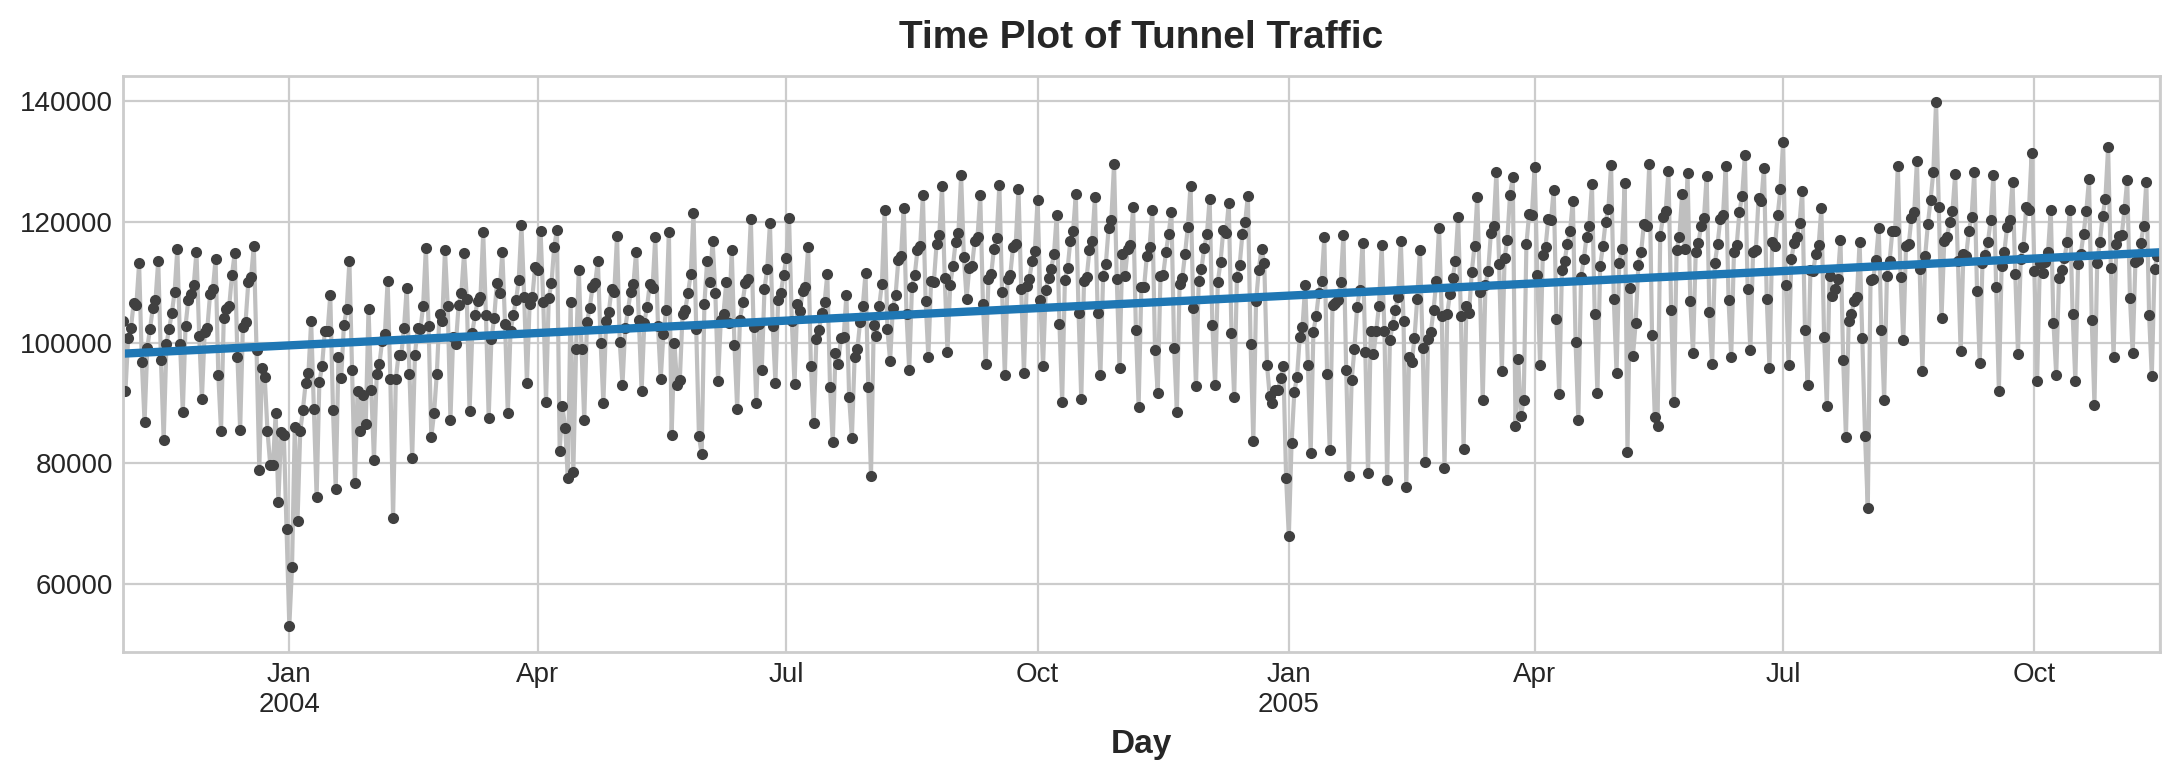

In [14]:
ax = y.plot(**plot_params)
ax = y_pred.plot(ax=ax, linewidth=3)
ax.set_title("Time Plot of Tunnel Traffic")

## Lag feature

In [24]:
df['Lag_1'] = df['NumVehicles'].shift(1)
df.head()

,NumVehicles,Time,Lag_1
Day,,,
2003-11-01,103536,0,NaN
2003-11-02,92051,1,103536.0
2003-11-03,100795,2,92051.0
2003-11-04,102352,3,100795.0
2003-11-05,106569,4,102352.0


In [25]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['Lag_1']]
X.dropna(inplace=True) # drop missing values in the feature set
y = df.loc[:, 'NumVehicles'] # create the target
y, X = y.align(X, join='inner') # drop corresponding values in target

model = LinearRegression()
model.fit(X, y)

y_pred = pd.Series(model.predict(X), index=X.index)

## Lag Plot
The lag plot shows us how well we were able to fit the relationship between the number of vehicles one day and the number the previous day.

Text(0.5, 1.0, 'Lag Plot of Tunnel Traffic')

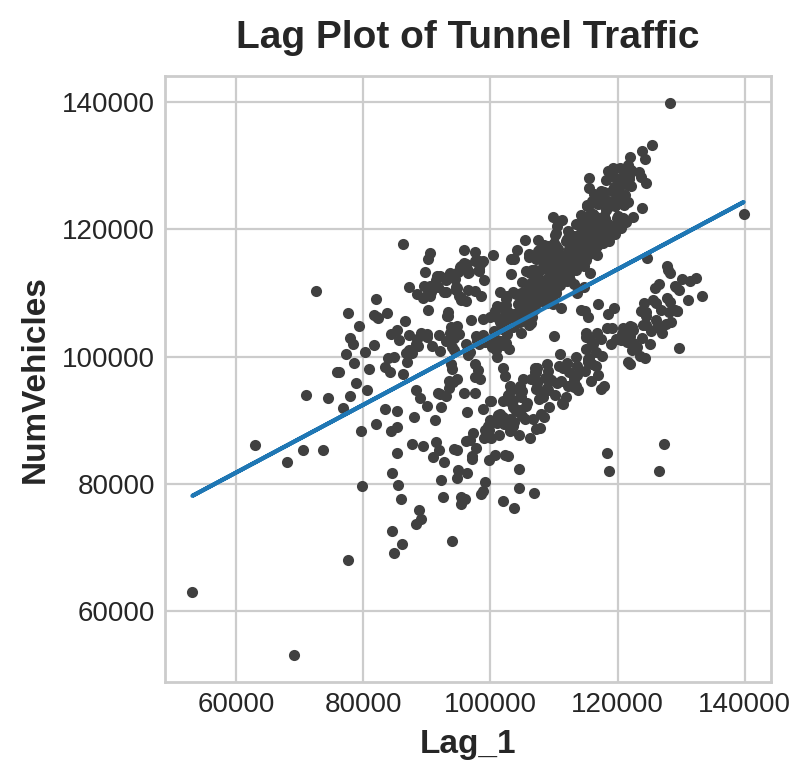

In [27]:
fig, ax = plt.subplots()
ax.plot(X['Lag_1'], y, '.', color='0.25')
ax.plot(X['Lag_1'], y_pred)
ax.set_aspect('equal')
ax.set_ylabel('NumVehicles')
ax.set_xlabel('Lag_1')
ax.set_title('Lag Plot of Tunnel Traffic')

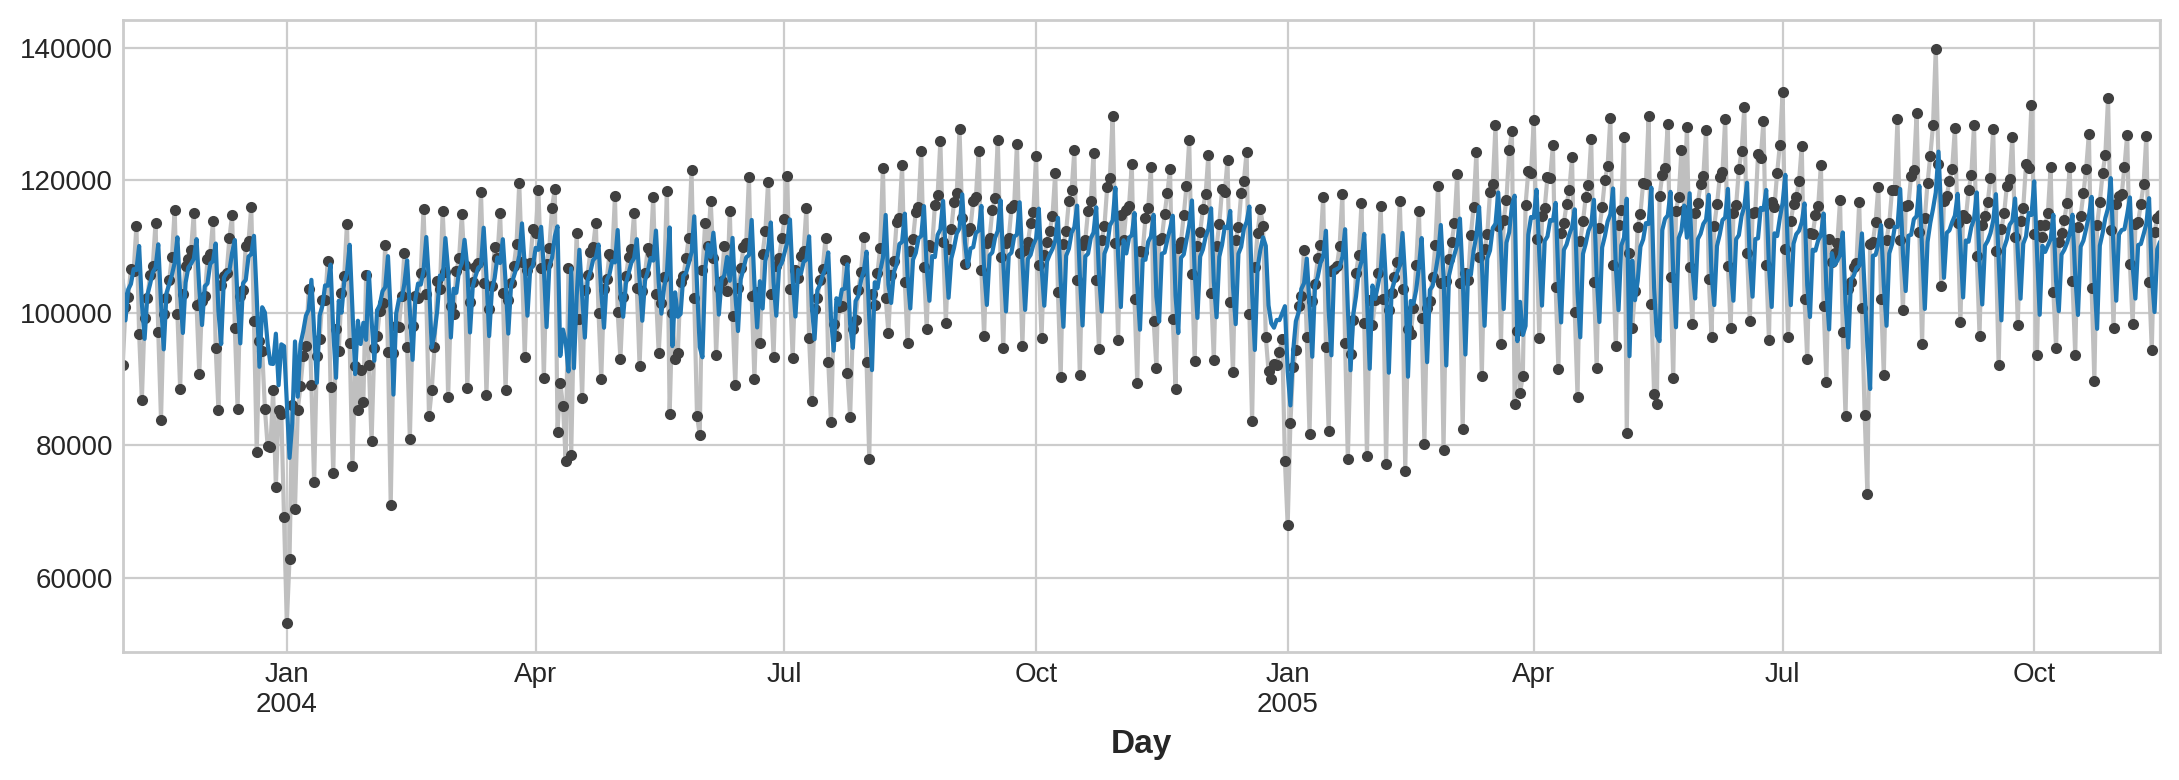

In [28]:
ax = y.plot(**plot_params)
ax = y_pred.plot()